In [1]:
# import packages
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import Bio
import statsmodels.api as sm
from pathlib import Path

Import cleaned data

In [2]:
path: str = './data/' #folder where files are stored
prokaryotes: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_unique_prot.csv"), dtype=str)   
prokaryotes_all: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_all.csv"), dtype=str)

import Amino acid list

In [3]:

%run ./Aminoacid_lists.py

calculate and append amino acid and property counts onto prokaryotes

In [4]:
from function import rel_aa_comp 
prokaryotes['hydrophobic'] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, AA_hydrophobic)) # calculates relative amino acid composition of hydrophobic amino acids
prokaryotes['polar_neutral'] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, AA_polar_neutral)) # calculates relative amino acid composition of polar neutral amino acids
prokaryotes['acidic'] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, AA_acidic)) # calculates relative amino acid composition of acidic amino acids
prokaryotes['basic'] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, AA_basic)) # calculates relative amino acid composition of basic amino acids

for i in range(len(AA_list)):
    prokaryotes[str(AA_list[i])] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, [str(AA_list[i])])) # calculates relative protein abundance


sort dataframe according to meltpoint and auc

In [5]:
prokaryotes_temp_m = prokaryotes.sort_values('meltPoint',ascending = False,na_position="first")
#prokaryotes.rank(axis=0, method: 'first',)

prokaryotes_temp_a = prokaryotes.sort_values('auc',ascending = False,na_position="first")

remove NaN from meltpoint

In [6]:
prokaryotes_temp_NaN = prokaryotes_temp_m.dropna(subset='meltPoint')


select top 10 and bottom 10 percentiles

In [7]:
prokaryote_top_10 = prokaryotes_temp_NaN.iloc[0:944,:]
prokaryote_bottom_10 = prokaryotes_temp_NaN.iloc[8492:9436,:]

prokaryote_top_30 = prokaryotes_temp_NaN.iloc[0:3000,:]
prokaryote_bottom_30 = prokaryotes_temp_NaN.iloc[6500:9436,:]

prokaryote_top_10['meltPoint'] = prokaryote_top_10['meltPoint'].astype(float)
prokaryote_bottom_10['meltPoint'] = prokaryote_bottom_10['meltPoint'].astype(float)

prokaryote_top_10['auc'] = prokaryote_top_10['auc'].astype(float)
prokaryote_bottom_10['auc'] = prokaryote_bottom_10['auc'].astype(float)

prokaryote_top_10['temperature'] = prokaryote_top_10['temperature'].astype(float)
prokaryote_bottom_10['temperature'] = prokaryote_bottom_10['temperature'].astype(float)

prokaryote_top_30['meltPoint'] = prokaryote_top_30['meltPoint'].astype(float)
prokaryote_bottom_30['meltPoint'] = prokaryote_bottom_30['meltPoint'].astype(float)

prokaryote_top_30['auc'] = prokaryote_top_30['auc'].astype(float)
prokaryote_bottom_30['auc'] = prokaryote_bottom_30['auc'].astype(float)

prokaryote_top_30['temperature'] = prokaryote_top_30['temperature'].astype(float)
prokaryote_bottom_30['temperature'] = prokaryote_bottom_30['temperature'].astype(float)

/var/folders/pm/vzcy9py91xzg_z5d80js6mtc0000gn/T/ipykernel_35468/1073663601.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prokaryote_top_10['meltPoint'] = prokaryote_top_10['meltPoint'].astype(float)
/var/folders/pm/vzcy9py91xzg_z5d80js6mtc0000gn/T/ipykernel_35468/1073663601.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prokaryote_bottom_10['meltPoint'] = prokaryote_bottom_10['meltPoint'].astype(float)
/var/folders/pm/vzcy9py91xzg_z5d80js6mtc0000gn/T/ipykernel_35468/1073663601.py:10: SettingWith

drop all middle rows
calculate the correlation mtrix and plot it

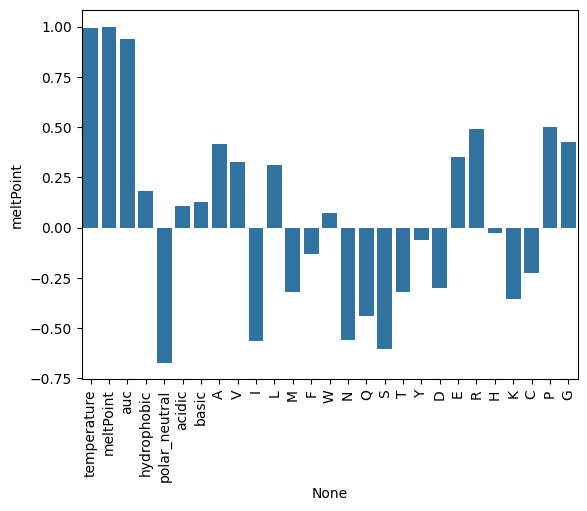

In [8]:
prokaryote_middle = prokaryotes_temp_NaN.drop(prokaryotes_temp_NaN.index[500:9000])

prokaryote_middle['auc'] = prokaryote_middle['auc'].astype(float)
prokaryote_middle['temperature'] = prokaryote_middle['temperature'].astype(float)
prokaryote_middle['meltPoint'] = prokaryote_middle['meltPoint'].astype(float)

prokm_60_corr = prokaryote_middle.corr('pearson', numeric_only=True)

sns.barplot(data= prokm_60_corr, y= 'meltPoint', x = prokm_60_corr.columns)
plt.xticks(rotation = 90)
plt.show()

same same aber mit if Funktion und Quantilen

In [33]:
prokaryotes_temp_NaN['meltPoint'] = prokaryotes_temp_NaN['meltPoint'].astype(float)
prokaryotes_temp_NaN['temperature'] = prokaryotes_temp_NaN['temperature'].astype(float)
prokaryotes_temp_NaN['auc'] = prokaryotes_temp_NaN['auc'].astype(float)

quantiles = prokaryotes_temp_NaN['meltPoint'].quantile(q=[0.1, 0.9])
quantiles = quantiles.astype('float64')
quantiles = list(quantiles)
#prokaryote_middle_q = prokaryotes_temp_NaN.drop(prokaryotes_temp_NaN.[(prokaryotes_temp_NaN['meltPoint'] < quantiles[0]) | (prokaryotes_temp_NaN['meltPoint'] > quantiles[1])])
#prokaryotes_temp_NaN.loc[(prokaryotes_temp_NaN['meltPoint'] < quantiles[0]) | (prokaryotes_temp_NaN['meltPoint'] > quantiles[1]),:]

for n in range(len(prokaryotes_temp_NaN)):
    if prokaryotes_temp_NaN.iloc[n,15] > quantiles[0] and prokaryotes_temp_NaN.iloc[n, 15] < quantiles[1]:
        prokaryotes_temp_NaN = prokaryotes_temp_NaN.drop(labels=n, axis=0)



KeyError: '[944] not found in axis'

In [38]:
uwaga = 3
prokaryotes_temp_NaN_ = prokaryotes_temp_NaN.drop(3)

KeyError: '[3] not found in axis'

calculate correlation of amino acid content between top 10 and bottow 10 meltpoins

In [ ]:

prokt_10_corr = prokaryote_top_10.corr('pearson', numeric_only=True)
prokb_10_corr = prokaryote_bottom_10.corr('pearson', numeric_only=True)

prokt_30_corr = prokaryote_top_30.corr('pearson', numeric_only=True)
prokb_30_corr = prokaryote_bottom_30.corr('pearson', numeric_only=True)


plotting the correlation

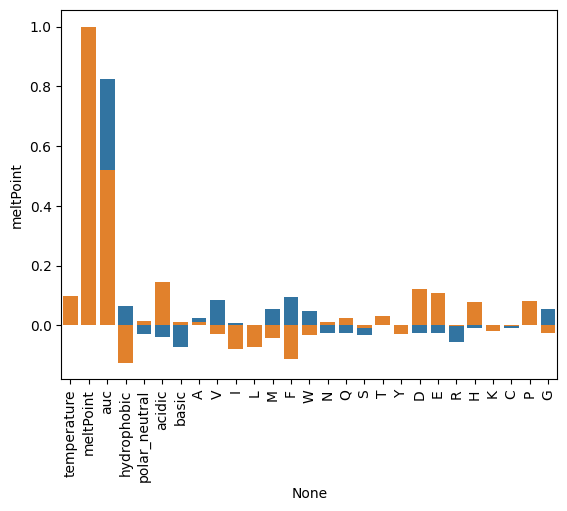

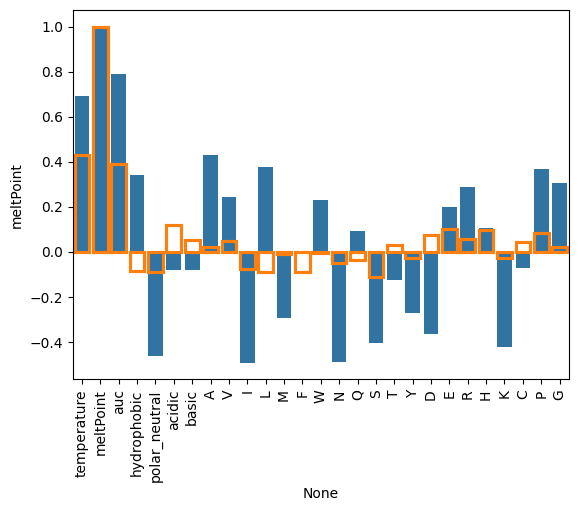

In [ ]:
sns.barplot(data= prokt_10_corr, y= 'meltPoint', x = prokt_10_corr.columns)
sns.barplot(data= prokb_10_corr, y= 'meltPoint', x = prokt_10_corr.columns)
plt.xticks(rotation = 90)
plt.show()

sns.barplot(data= prokt_30_corr, y= 'meltPoint', x = prokt_30_corr.columns)
sns.barplot(data= prokb_30_corr, y= 'meltPoint', x = prokb_30_corr.columns, fill=False)
plt.xticks(rotation = 90)
plt.show()